<a href="https://colab.research.google.com/github/Askarizadeh/DC-NN-optimizer/blob/main/Weight_TL_Stroke_prediction_with_one_hidden_layer_NN_Oct_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!

In [131]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [132]:
def acc(predictions, test_labels):
  true_predictions=0
  for i, pred in enumerate(predictions):
    term = 1 if pred >= 0.5 else 0
    if term == test_labels[i]:
      true_predictions += 1
  return true_predictions/len(test_labels)


In [133]:
# Load your dataset
df = pd.read_excel('/content/balanced-stroke dataset.xlsx')


# New Section

In [134]:
df.shape

(499, 12)

In [135]:
# Check for missing values
missing_values = df.isnull().sum()


In [136]:
missing_values

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  45
smoking_status        0
stroke                0
dtype: int64

In [137]:
# Handle missing values (e.g., drop rows with missing values)
df.dropna(inplace=True)

In [138]:
df.shape

(454, 12)

In [139]:
numerical = ['age', 'hypertension', 'avg_glucose_level', 'bmi']
categorical = ['heart_disease', 'gender', 'ever_married', 'work_type', "Residence_type", "smoking_status"]

In [140]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
df_modified = pd.get_dummies(df, columns=categorical)
df_modified = df_modified.drop(columns="id")

In [142]:
np.array(df_modified)[2,:]

array([ 49.  ,   0.  , 171.23,  34.4 ,   1.  ,   1.  ,   0.  ,   1.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ])

In [143]:
sc = MinMaxScaler()
df_modified[numerical] = sc.fit_transform(df_modified[numerical])

In [144]:
np.array(df_modified).shape

(454, 22)

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X = df_modified.drop("stroke", axis=1).to_numpy()
y = df_modified['stroke'].to_numpy()

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.97)

In [148]:
X_train = X_train[:,:15]
X_test = X_test[:,:15]

In [149]:
X_train.shape

(13, 15)

In [150]:
y_train.shape

(13,)

In [151]:
#X_train = X_train[:10,:]
#y_train = y_train[:10,]
#chagned by kaveh

In [152]:
X_train.shape

(13, 15)

In [153]:
y_train.shape

(13,)

In [154]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [155]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float().unsqueeze(1)
y_test = torch.tensor(y_test).float().unsqueeze(1)

In [156]:
#class StrokeNN(nn.Module):
 #   def __init__(self):
  #      super(StrokeNN, self).__init__()
   #     self.fc1 = nn.Linear(21, 64)
    #    self.fc2 = nn.Linear(64, 128)
     #   self.fc3 = nn.Linear(128, 256)
      #  self.fc4 = nn.Linear(256, 1)
       # self.act = nn.LeakyReLU()
       # self.sigmoid = nn.Sigmoid()
        #self.dropout = nn.Dropout(0.1)
    #def forward(self, x):
       # x = self.act(self.fc1(x))
       # x = self.act(self.fc2(x))
       # x = self.act(self.fc3(x))
       # x = self.dropout(x)
       # return self.sigmoid(self.fc4(x))

In [157]:
import torch
import torch.nn as nn

class PredictionNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(PredictionNN, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    #self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, output_size)
    #self.relu = nn.ReLU()
    #self.fc3 = nn.Linear(hidden_size, output_size)
    self.act = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
    #self.dropout = nn.Dropout(0.1)
    #self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out = self.fc1(x)
    out = self.act(out)
    #out = self.dropout(out)
    out = self.fc2(out)
    #out = self.relu(out)
    #out = self.fc3(out)
    out = self.sigmoid(out)
    return out

# Define the model
input_size = 15  # Number of features
hidden_size = 16  # Adjust as needed
output_size = 1  # Binary classification (stroke or no stroke)
net = PredictionNN(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# Print the model architecture


In [158]:
#net = StrokeNN()

In [159]:
#optimizer = optim.AdamW(net.parameters())
#criterion = nn.BCELoss()

In [160]:
tests = []
losses = []
#max_test = 0
#best_params = net.state_dict()
# changed by Kaveh for epoch in range(1, 50):
for epoch in range(1, 1000):
    optimizer.zero_grad()
    outputs = net(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    with torch.no_grad():
      predictions = net(X_test)
      tests.append(acc(predictions, y_test))
    #_, preds_y = torch.max(outputs, 1)
    #added by kaveh
    #print(preds_y)
    #train_acc = accuracy_score(y_train, preds_y)

    #pred_test = net(X_test)
    #_, preds_test_y = torch.max(pred_test, 1)
    #test_acc = accuracy_score(y_test, preds_test_y)
    #print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(),
    #                                                                  train_acc*100, test_acc * 100))
    #if test_acc > max_test:
     #   max_test = test_acc
      #  best_params = net.state_dict()
#net.load_state_dict(best_params)

In [161]:
import matplotlib.pyplot as plt

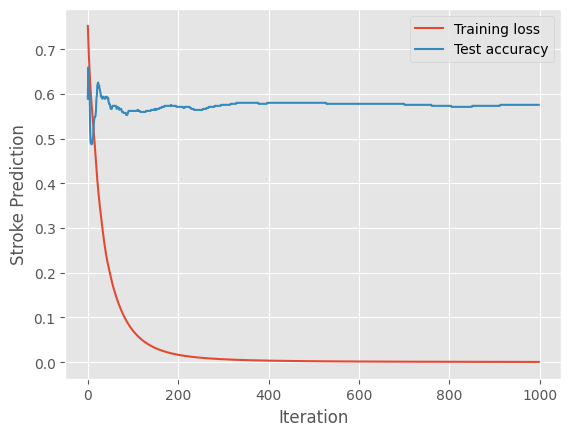

In [162]:
plt.plot(losses, label="Training loss")

plt.plot(tests, label="Test accuracy")

plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Stroke Prediction")
plt.title("")
plt.legend(loc="upper right")
plt.style.use('ggplot')
plt.show()

In [163]:
dg = pd.read_csv('/content/framingham.csv')


In [164]:
dg.shape

(4240, 16)

In [165]:
missing_valuess = dg.isnull().sum()

In [166]:
missing_valuess

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [167]:
# Handle missing values (e.g., drop rows with missing values)
dg.dropna(inplace=True)

In [168]:
dg.shape

(3658, 16)

In [169]:
ssc = MinMaxScaler()

In [170]:
dg_modified = ssc.fit_transform(dg)

In [171]:
dg_modified.shape

(3658, 16)

In [172]:
X0 = dg_modified[:, :-1]  # Assuming you want all columns except the last one
y0 = dg_modified[:, -1]  # Assuming the last column is your target

In [173]:
y0.shape

(3658,)

In [174]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.20)

In [175]:
X0_train.shape

(2926, 15)

In [176]:
X0_train = torch.tensor(X0_train).float()
X0_test = torch.tensor(X0_test).float()
y0_train = torch.tensor(y0_train).float().unsqueeze(1)
y0_test = torch.tensor(y0_test).float().unsqueeze(1)

In [177]:
X0_train.shape

torch.Size([2926, 15])

In [178]:
import torch
import torch.nn as nn

class HeartPredictionNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(HeartPredictionNN, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    #self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, output_size)
    self.act = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
    #self.dropout = nn.Dropout(0.1)
    #self.relu = nn.ReLU()
    #self.fc3 = nn.Linear(hidden_size, output_size)
    #self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out = self.fc1(x)
    out = self.act(out)
    #out = self.dropout(out)
    out = self.fc2(out)
    #out = self.relu(out)
    #out = self.fc3(out)
    out = self.sigmoid(out)
    return out

# Define the model
input_size = 15  # Number of features
hidden_size = 16  # Adjust as needed
output_size = 1  # Binary classification (stroke or no stroke)
net0 = HeartPredictionNN(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(net0.parameters(), lr=0.01)

# Print the model architecture


In [179]:
tests0 = []
losses0 = []
#max_test = 0
#best_params = net0.state_dict()
# changed by Kaveh for epoch in range(1, 50):
for epoch in range(1, 1000):
    optimizer.zero_grad()
    outputs = net0(X0_train)
    loss = criterion(outputs, y0_train)
    loss.backward()
    optimizer.step()
    losses0.append(loss.item())
    with torch.no_grad():
      predictions = net0(X0_test)
      tests0.append(acc(predictions, y0_test))
    #_, preds_y = torch.max(outputs, 1)
    #added by kaveh
    #print(preds_y)
    #train_acc = accuracy_score(y_train, preds_y)

    #pred_test = net(X_test)
    #_, preds_test_y = torch.max(pred_test, 1)
    #test_acc = accuracy_score(y_test, preds_test_y)
    #print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(),
    #                                                                  train_acc*100, test_acc * 100))
    #if test_acc > max_test:
     #   max_test = test_acc
      #  best_params = net.state_dict()
#net.load_state_dict(best_params)

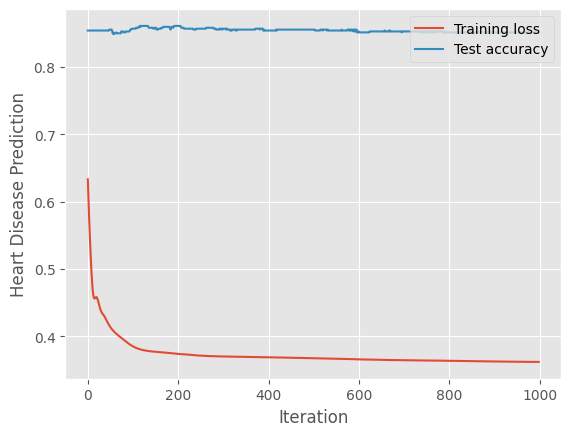

In [180]:
plt.plot(losses0, label="Training loss")

plt.plot(tests0, label="Test accuracy")

plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Heart Disease Prediction")
plt.title("")
plt.legend(loc="upper right")
plt.style.use('ggplot')
plt.show()

In [181]:
import torch
import torch.nn as nn

# Define a common architecture
class CommonMLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(CommonMLP, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    #self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, output_size)
    self.act = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
    #self.dropout = nn.Dropout(0.1)
    #self.relu = nn.ReLU()
    #self.fc3 = nn.Linear(hidden_size, output_size)
    #self.output = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.act(x)
    #x =self.dropout(x)
    x = self.fc2(x)
    #x = self.relu(x)
    #x = self.fc3(x)
    x = self.sigmoid(x)
    return x


In [182]:
input_size = 15  # Assuming 15 features in your datasets
hidden_size = 16  # You can adjust this as needed
output_size = 1

source_model = CommonMLP(input_size, hidden_size, output_size)
target_model = CommonMLP(input_size, hidden_size,output_size)

In [183]:
tests00 = []
losses00 = []
#max_test = 0
#best_params = source_model.state_dict()
# changed by Kaveh for epoch in range(1, 50):
for epoch in range(1, 1000):
    optimizer.zero_grad()
    outputs = source_model(X0_train)
    loss = criterion(outputs, y0_train)
    loss.backward()
    optimizer.step()
    losses00.append(loss.item())
    with torch.no_grad():
      predictions = source_model(X0_test)
      tests00.append(acc(predictions, y0_test))
    #_, preds_y = torch.max(outputs, 1)
    #added by kaveh
    #print(preds_y)
    #train_acc = accuracy_score(y_train, preds_y)

    #pred_test = net(X_test)
    #_, preds_test_y = torch.max(pred_test, 1)
    #test_acc = accuracy_score(y_test, preds_test_y)
    #print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(),
    #                                                                  train_acc*100, test_acc * 100))
    #if test_acc > max_test:
     #   max_test = test_acc
      #  best_params = net.state_dict()
#net.load_state_dict(best_params)

In [184]:
# Copy source model weights to the target model
target_model.load_state_dict(source_model.state_dict())


<All keys matched successfully>

In [185]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(target_model.parameters(), lr=0.01)

In [186]:
testss = []
lossess = []
#max_test = 0
#best_params = target_model.state_dict()
# changed by Kaveh for epoch in range(1, 50):
for epoch in range(1, 1000):
    optimizer.zero_grad()
    outputs = target_model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    lossess.append(loss.item())
    with torch.no_grad():
      predictions = target_model(X_test)
      testss.append(acc(predictions, y_test))
    #_, preds_y = torch.max(outputs, 1)
    #added by kaveh
    #print(preds_y)
    #train_acc = accuracy_score(y_train, preds_y)

    #pred_test = net(X_test)
    #_, preds_test_y = torch.max(pred_test, 1)
    #test_acc = accuracy_score(y_test, preds_test_y)
    #print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(),
    #                                                                  train_acc*100, test_acc * 100))
    #if test_acc > max_test:
     #   max_test = test_acc
      #  best_params = net.state_dict()
#net.load_state_dict(best_params)

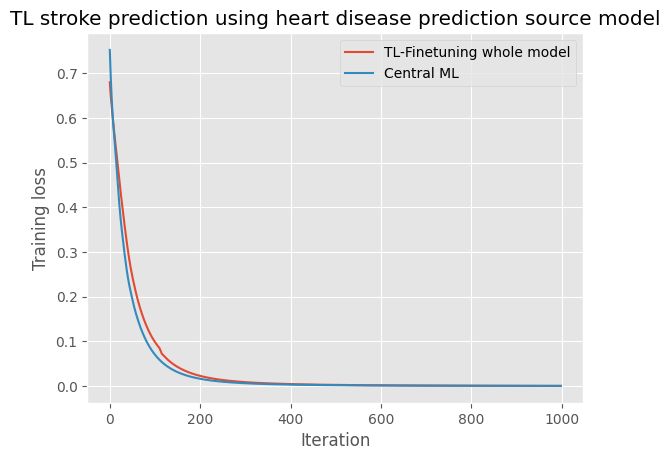

In [187]:
plt.plot(lossess, label="TL-Finetuning whole model")

plt.plot(losses, label="Central ML")

plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Training loss")
plt.title("TL stroke prediction using heart disease prediction source model")
plt.legend(loc="upper right")
plt.style.use('ggplot')
plt.show()

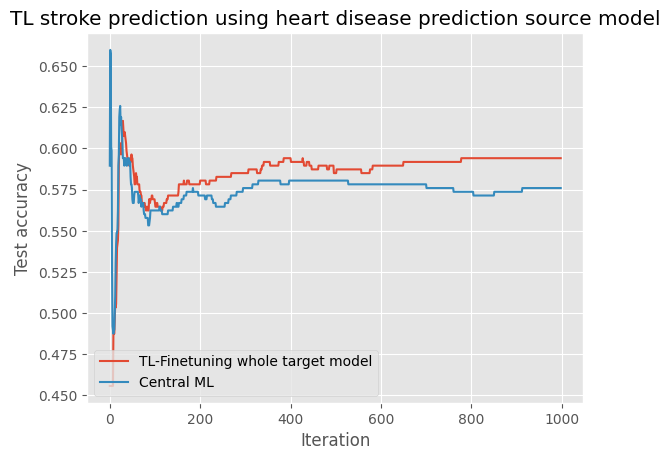

In [188]:


plt.plot(testss, label="TL-Finetuning whole target model")
plt.plot(tests, label="Central ML")
plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Test accuracy")
plt.title("TL stroke prediction using heart disease prediction source model")
plt.legend(loc="lower left")
plt.style.use('ggplot')
plt.show()

In [189]:
target_model_1 = CommonMLP(input_size, hidden_size,output_size)
target_model_12 = CommonMLP(input_size, hidden_size,output_size)
target_model_nt = CommonMLP(input_size, hidden_size,output_size)
target_model_nt1 = CommonMLP(input_size, hidden_size,output_size)
target_model_1.load_state_dict(source_model.state_dict())
target_model_12.load_state_dict(source_model.state_dict())
target_model_nt.load_state_dict(source_model.state_dict())
target_model_nt1.load_state_dict(source_model.state_dict())

<All keys matched successfully>

In [190]:
losses[1000-2]

0.0004619319806806743

In [191]:
test_nt = []
loss_nt = []
max_loss = torch.tensor(-10+losses[1000-2], dtype=torch.float32, requires_grad=True)
optimizer = torch.optim.Adam(target_model_nt.parameters(), lr=0.01)
#max_test = 0
#best_params = target_model.state_dict()
# changed by Kaveh for epoch in range(1, 50):
for epoch in range(1, 1000):
    optimizer.zero_grad()
    outputs = target_model_nt(X_train)
    loss = criterion(outputs, y_train)
    penalty = torch.clamp(loss - max_loss, min=0)
    loss += penalty
    loss.backward()
    optimizer.step()
    loss_nt.append(loss.item())
    with torch.no_grad():
      predictions = target_model_nt(X_test)
      test_nt.append(acc(predictions, y_test))
    #_, preds_y = torch.max(outputs, 1)
    #added by kaveh
    #print(preds_y)
    #train_acc = accuracy_score(y_train, preds_y)

    #pred_test = net(X_test)
    #_, preds_test_y = torch.max(pred_test, 1)
    #test_acc = accuracy_score(y_test, preds_test_y)
    #print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(),
    #                                                                  train_acc*100, test_acc * 100))
    #if test_acc > max_test:
     #   max_test = test_acc
      #  best_params = net.state_dict()
#net.load_state_dict(best_params)

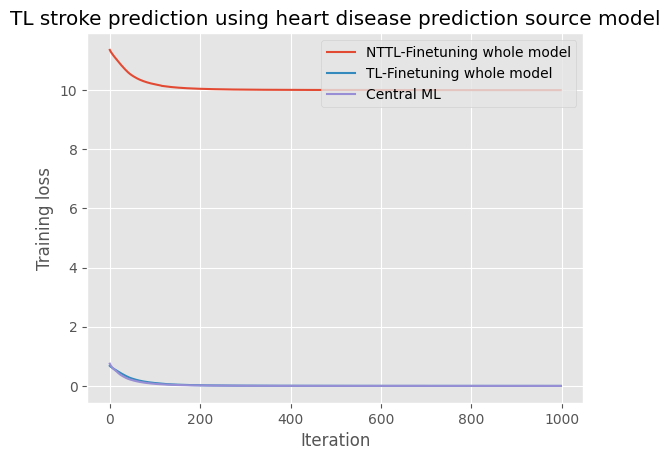

In [192]:
plt.plot(loss_nt, label="NTTL-Finetuning whole model")
plt.plot(lossess, label="TL-Finetuning whole model")

plt.plot(losses, label="Central ML")

plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Training loss")
plt.title("TL stroke prediction using heart disease prediction source model")
plt.legend(loc="upper right")
plt.style.use('ggplot')
plt.show()

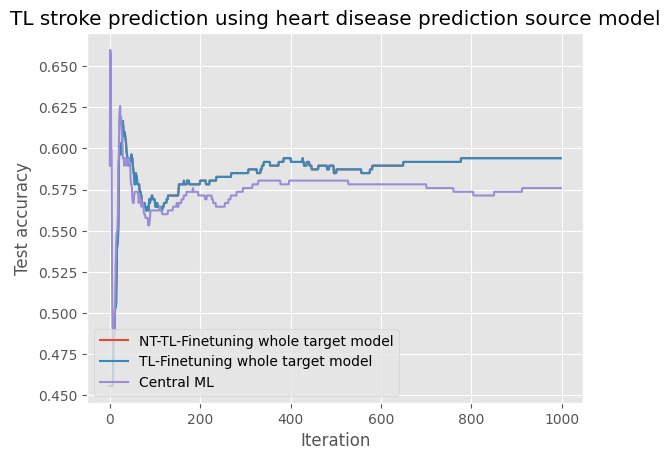

In [193]:

plt.plot(test_nt, label="NT-TL-Finetuning whole target model")
plt.plot(testss, label="TL-Finetuning whole target model")
plt.plot(tests, label="Central ML")
plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Test accuracy")
plt.title("TL stroke prediction using heart disease prediction source model")
plt.legend(loc="lower left")
plt.style.use('ggplot')
plt.show()

In [194]:
#optimizer = torch.optim.Adam([{'params': target_model_1.fc2.parameters(),'lr': 0.01},
 #   {'params': target_model_1.fc3.parameters(), 'lr': 0.01}])
optimizer = torch.optim.Adam([{'params': target_model_1.fc1.parameters(),'lr': 0.01},
   {'params': target_model_1.fc2.parameters(), 'lr': 0.01}])


#optimizer = torch.optim.Adam([
 #   {'params': target_model.fc1.parameters()},  # Modify these lines as per your architecture
  #  {'params': target_model.fc2.parameters()},
   # {'params': target_model.output.parameters(), 'lr': 0.01}  # Adjust the learning rate if needed
#])
testsss = []
lossesss = []
 #max_test = 0
 #best_params = target_model.state_dict()
# changed by Kaveh for epoch in range(1, 50):
for epoch in range(1, 1000):
    optimizer.zero_grad()
    outputs = target_model_1(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    lossesss.append(loss.item())
    with torch.no_grad():
      predictions = target_model_1(X_test)
      testsss.append(acc(predictions, y_test))
    #_, preds_y = torch.max(outputs, 1)
    #added by kaveh
    #print(preds_y)
    #train_acc = accuracy_score(y_train, preds_y)

    #pred_test = net(X_test)
    #_, preds_test_y = torch.max(pred_test, 1)
    #test_acc = accuracy_score(y_test, preds_test_y)
    #print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(),
    #                                                                  train_acc*100, test_acc * 100))
    #if test_acc > max_test:
     #   max_test = test_acc
      #  best_params = net.state_dict()
#net.load_state_dict(best_params)

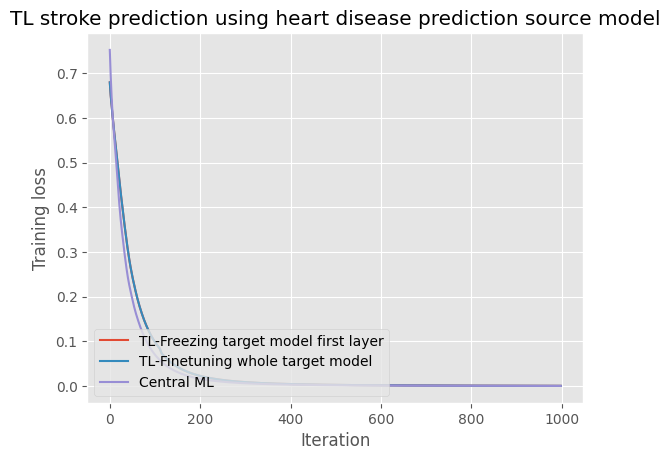

In [195]:
plt.plot(lossesss, label="TL-Freezing target model first layer")

plt.plot(lossess, label="TL-Finetuning whole target model")

plt.plot(losses, label="Central ML")
plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Training loss")
plt.title("TL stroke prediction using heart disease prediction source model")
plt.legend(loc="lower left")
plt.style.use('ggplot')
plt.show()

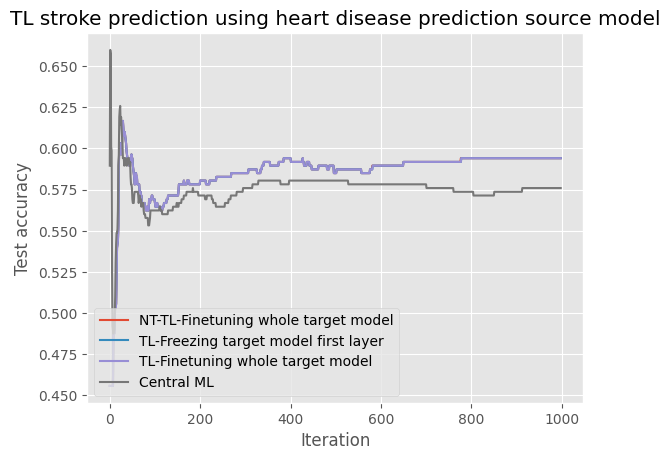

In [196]:
plt.plot(test_nt, label="NT-TL-Finetuning whole target model")
plt.plot(testsss,label="TL-Freezing target model first layer")
plt.plot(testss, label="TL-Finetuning whole target model")
plt.plot(tests, label="Central ML")
plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Test accuracy")
plt.title("TL stroke prediction using heart disease prediction source model")
plt.legend(loc="lower left")
plt.style.use('ggplot')
plt.show()

#plt.plot(x, y, 'o', label='Circle Marker')
#plt.plot(x, y, '*', label='Star Marker')
#plt.plot(x, y, '^', label='Upward Triangle Marker')
#plt.plot(x, y, 's', label='Square Marker')
#plt.plot(x, y, 'D', label='Diamond Marker')

In [197]:
optimizer = torch.optim.Adam([ {'params': target_model_12.fc2.parameters(), 'lr': 0.01}  # Adjust the learning rate if needed
])

#optimizer = torch.optim.Adam([
 #   {'params': target_model.fc1.parameters()},  # Modify these lines as per your architecture
  #  {'params': target_model.fc2.parameters()},
   # {'params': target_model.output.parameters(), 'lr': 0.01}  # Adjust the learning rate if needed
#])
testssss = []
lossessss = []
 #max_test = 0
 #best_params = target_model.state_dict()
# changed by Kaveh for epoch in range(1, 50):
for epoch in range(1, 1000):
    optimizer.zero_grad()
    outputs = target_model_12(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    lossessss.append(loss.item())
    with torch.no_grad():
      predictions = target_model_12(X_test)
      testssss.append(acc(predictions, y_test))
    #_, preds_y = torch.max(outputs, 1)
    #added by kaveh
    #print(preds_y)
    #train_acc = accuracy_score(y_train, preds_y)

    #pred_test = net(X_test)
    #_, preds_test_y = torch.max(pred_test, 1)
    #test_acc = accuracy_score(y_test, preds_test_y)
    #print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(),
    #                                                                  train_acc*100, test_acc * 100))
    #if test_acc > max_test:
     #   max_test = test_acc
      #  best_params = net.state_dict()
#net.load_state_dict(best_params)

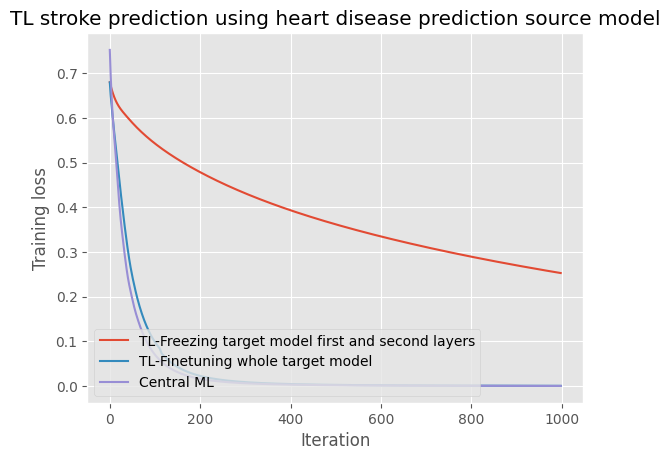

In [198]:
plt.plot(lossessss, label="TL-Freezing target model first and second layers")
#plt.plot(lossesss, label="TL-Freezing target model first layer")

plt.plot(lossess, label="TL-Finetuning whole target model")

plt.plot(losses, label="Central ML")
plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Training loss")
plt.title("TL stroke prediction using heart disease prediction source model")
plt.legend(loc="lower left")
plt.style.use('ggplot')
plt.show()

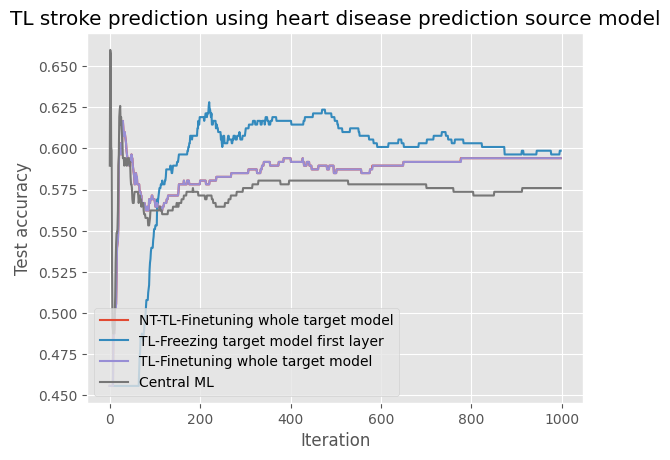

In [199]:
plt.plot(test_nt, label="NT-TL-Finetuning whole target model")
plt.plot(testssss,label="TL-Freezing target model first layer")
#plt.plot(testsss,label="TL-Freezing target model first layer")
plt.plot(testss, label="TL-Finetuning whole target model")
plt.plot(tests, label="Central ML")
plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Test accuracy")
plt.title("TL stroke prediction using heart disease prediction source model")
plt.legend(loc="lower left")
plt.style.use('ggplot')
plt.show()

#plt.plot(x, y, 'o', label='Circle Marker')
#plt.plot(x, y, '*', label='Star Marker')
#plt.plot(x, y, '^', label='Upward Triangle Marker')
#plt.plot(x, y, 's', label='Square Marker')
#plt.plot(x, y, 'D', label='Diamond Marker')

In [200]:
optimizer = torch.optim.Adam(target_model_nt1.parameters(), lr=0.01)

In [201]:
optimizer = torch.optim.Adam([ {'params': target_model_nt1.fc2.parameters(), 'lr': 0.01}  # Adjust the learning rate if needed
])

#optimizer = torch.optim.Adam([
 #   {'params': target_model.fc1.parameters()},  # Modify these lines as per your architecture
  #  {'params': target_model.fc2.parameters()},
   # {'params': target_model.output.parameters(), 'lr': 0.01}  # Adjust the learning rate if needed
#])
test_nt1 = []
loss_nt1 = []
 #max_test = 0
 #best_params = target_model.state_dict()
# changed by Kaveh for epoch in range(1, 50):
for epoch in range(1, 1000):
    optimizer.zero_grad()
    outputs = target_model_nt1(X_train)
    loss = criterion(outputs, y_train)
    penalty = torch.clamp(loss - max_loss, min=0)
    loss += penalty
    loss.backward()
    optimizer.step()
    loss_nt1.append(loss.item())
    with torch.no_grad():
      predictions = target_model_nt1(X_test)
      test_nt1.append(acc(predictions, y_test))
    #_, preds_y = torch.max(outputs, 1)
    #added by kaveh
    #print(preds_y)
    #train_acc = accuracy_score(y_train, preds_y)

    #pred_test = net(X_test)
    #_, preds_test_y = torch.max(pred_test, 1)
    #test_acc = accuracy_score(y_test, preds_test_y)
    #print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(),
    #                                                                  train_acc*100, test_acc * 100))
    #if test_acc > max_test:
     #   max_test = test_acc
      #  best_params = net.state_dict()
#net.load_state_dict(best_params)

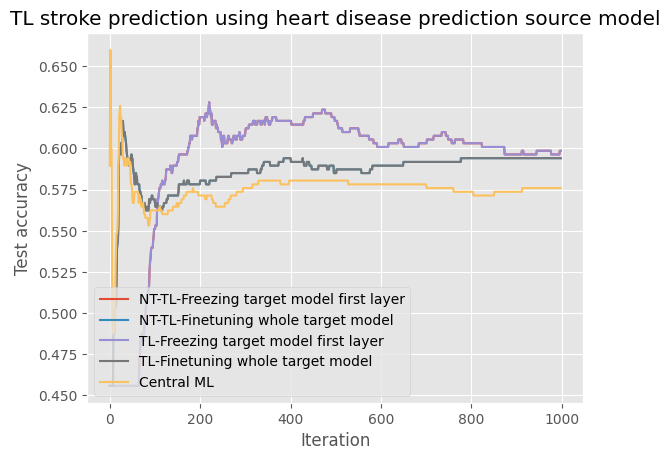

In [202]:
plt.plot(test_nt1, label="NT-TL-Freezing target model first layer")
plt.plot(test_nt, label="NT-TL-Finetuning whole target model")
plt.plot(testssss,label="TL-Freezing target model first layer")
#plt.plot(testsss,label="TL-Freezing target model first layer")
plt.plot(testss, label="TL-Finetuning whole target model")
plt.plot(tests, label="Central ML")
plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Test accuracy")
plt.title("TL stroke prediction using heart disease prediction source model")
plt.legend(loc="lower left")
plt.style.use('ggplot')
plt.show()

#plt.plot(x, y, 'o', label='Circle Marker')
#plt.plot(x, y, '*', label='Star Marker')
#plt.plot(x, y, '^', label='Upward Triangle Marker')
#plt.plot(x, y, 's', label='Square Marker')
#plt.plot(x, y, 'D', label='Diamond Marker')

In [203]:
Hy = pd.read_excel('/content/Hypertension.xlsx')

In [204]:
Hy.shape

(1007, 16)

In [205]:
missing_valuess = Hy.isnull().sum()

In [206]:
Hy_modified = ssc.fit_transform(Hy)

In [207]:
Hy_modified.shape

(1007, 16)

In [208]:
Xh = Hy_modified[:, :-1]  # Assuming you want all columns except the last one
yh = Hy_modified[:, -1]  # Assuming the last column is your target

In [209]:
Xh.shape

(1007, 15)

In [210]:
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.20)

In [211]:
Xh_train = torch.tensor(Xh_train).float()
Xh_test = torch.tensor(Xh_test).float()
yh_train = torch.tensor(yh_train).float().unsqueeze(1)
yh_test = torch.tensor(yh_test).float().unsqueeze(1)

In [212]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define your MLP model
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x

# Define hyperparameters
input_size = 15  # Number of features
hidden_size = 16  # Number of neurons in the hidden layer
output_size = 1  # Output dimension for regression (single continuous value)

learning_rate = 0.001
batch_size = 64
num_epochs = 1000

# Create an instance of the MLP model
model = MLP(input_size, hidden_size, output_size)

# Define the appropriate loss function for regression (Mean Squared Error)
criterion = nn.MSELoss()

# Use an appropriate optimizer, e.g., Adam
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Load your dataset (X_train and y_train) and convert it to PyTorch tensors
# Ensure your dataset is appropriately preprocessed (e.g., normalized)

# Create a DataLoader for batch training
dataset = TensorDataset(Xh_train, yh_train)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

loss_Hy = []
test_Hy = []
# Training loop
for epoch in range(num_epochs):
  for inputs, labels in dataloader:
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(inputs)  # Forward pass
    loss = criterion(outputs, labels)  # Compute the loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update the weights
    loss_Hy.append(loss.item())
    with torch.no_grad():
      predictions = model(Xh_test)
      test_Hy.append(criterion(predictions, yh_test))




# Save or use the trained model for regression predictions


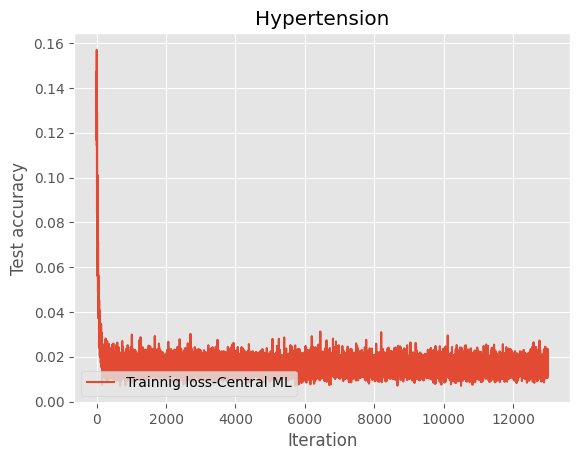

In [213]:

plt.plot(loss_Hy, label="Trainnig loss-Central ML")
plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Test accuracy")
plt.title("Hypertension")
plt.legend(loc="lower left")
plt.style.use('ggplot')
plt.show()

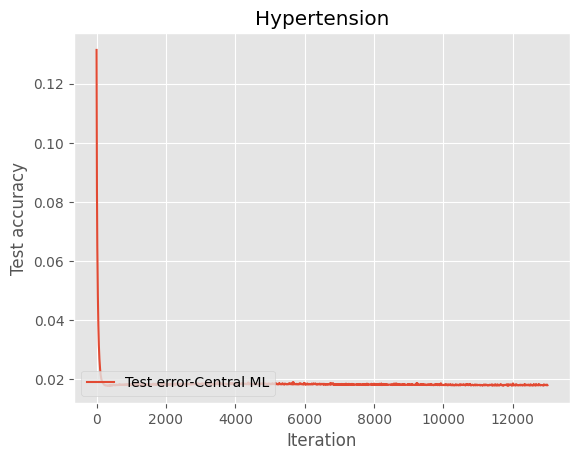

In [214]:
plt.plot(test_Hy, label="Test error-Central ML")

plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Test accuracy")
plt.title("Hypertension")
plt.legend(loc="lower left")
plt.style.use('ggplot')
plt.show()

In [215]:
target_model_H1 = CommonMLP(input_size, hidden_size,output_size)
target_model_H = CommonMLP(input_size, hidden_size,output_size)

target_model_H1.load_state_dict(model.state_dict())
target_model_H.load_state_dict(model.state_dict())


<All keys matched successfully>

In [216]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(target_model_H.parameters(), lr=0.01)
test_HS = []
loss_HS = []
#max_test = 0
#best_params = target_model.state_dict()
# changed by Kaveh for epoch in range(1, 50):
for epoch in range(1, 1000):
    optimizer.zero_grad()
    outputs = target_model_H(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    loss_HS.append(loss.item())
    with torch.no_grad():
      predictions = target_model_H(X_test)
      test_HS.append(acc(predictions, y_test))
    #_, preds_y = torch.max(outputs, 1)
    #added by kaveh
    #print(preds_y)
    #train_acc = accuracy_score(y_train, preds_y)

    #pred_test = net(X_test)
    #_, preds_test_y = torch.max(pred_test, 1)
    #test_acc = accuracy_score(y_test, preds_test_y)
    #print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(),
    #                                                                  train_acc*100, test_acc * 100))
    #if test_acc > max_test:
     #   max_test = test_acc
      #  best_params = net.state_dict()
#net.load_state_dict(best_params)

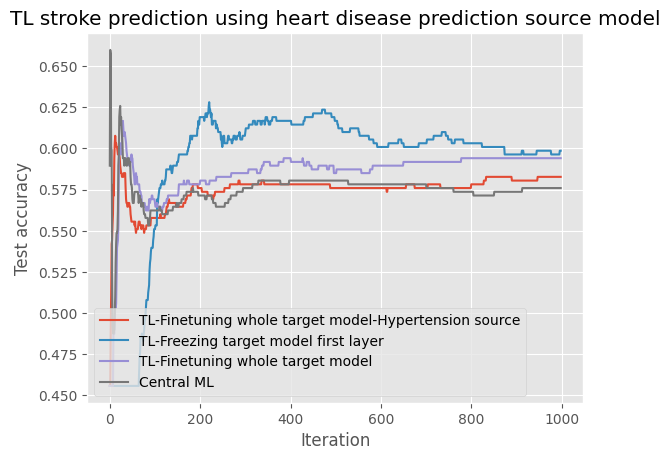

In [217]:

plt.plot(test_HS, label="TL-Finetuning whole target model-Hypertension source")
plt.plot(testssss,label="TL-Freezing target model first layer")
#plt.plot(testsss,label="TL-Freezing target model first layer")
plt.plot(testss, label="TL-Finetuning whole target model")
plt.plot(tests, label="Central ML")
plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Test accuracy")
plt.title("TL stroke prediction using heart disease prediction source model")
plt.legend(loc="lower left")
plt.style.use('ggplot')
plt.show()

#plt.plot(x, y, 'o', label='Circle Marker')
#plt.plot(x, y, '*', label='Star Marker')
#plt.plot(x, y, '^', label='Upward Triangle Marker')
#plt.plot(x, y, 's', label='Square Marker')
#plt.plot(x, y, 'D', label='Diamond Marker')

In [218]:
optimizer = torch.optim.Adam([ {'params': target_model_H1.fc2.parameters(), 'lr': 0.01}  # Adjust the learning rate if needed
])

#optimizer = torch.optim.Adam([
 #   {'params': target_model.fc1.parameters()},  # Modify these lines as per your architecture
  #  {'params': target_model.fc2.parameters()},
   # {'params': target_model.output.parameters(), 'lr': 0.01}  # Adjust the learning rate if needed
#])
test_HS1 = []
loss_HS1 = []
 #max_test = 0
 #best_params = target_model.state_dict()
# changed by Kaveh for epoch in range(1, 50):
for epoch in range(1, 1000):
    optimizer.zero_grad()
    outputs = target_model_H1(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    loss_HS1.append(loss.item())
    with torch.no_grad():
      predictions = target_model_H1(X_test)
      test_HS1.append(acc(predictions, y_test))
    #_, preds_y = torch.max(outputs, 1)
    #added by kaveh
    #print(preds_y)
    #train_acc = accuracy_score(y_train, preds_y)

    #pred_test = net(X_test)
    #_, preds_test_y = torch.max(pred_test, 1)
    #test_acc = accuracy_score(y_test, preds_test_y)
    #print("Epoch {}, Loss: {}, Acc:{:.2f}%, Test Acc: {:.2f}%".format(epoch, loss.item(),
    #                                                                  train_acc*100, test_acc * 100))
    #if test_acc > max_test:
     #   max_test = test_acc
      #  best_params = net.state_dict()
#net.load_state_dict(best_params)

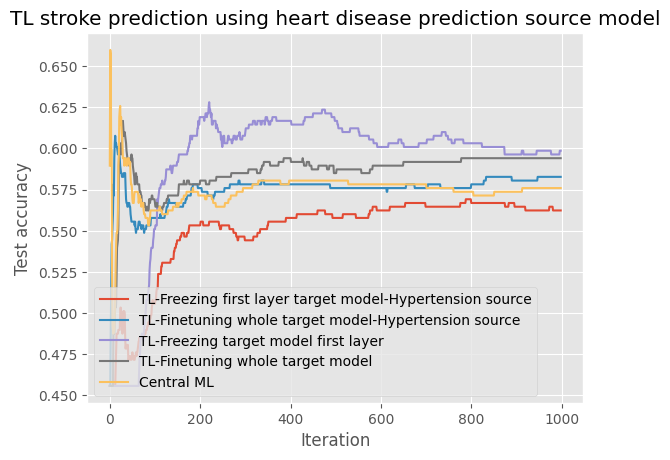

In [219]:
plt.plot(test_HS1, label="TL-Freezing first layer target model-Hypertension source")
plt.plot(test_HS, label="TL-Finetuning whole target model-Hypertension source")
plt.plot(testssss,label="TL-Freezing target model first layer")
#plt.plot(testsss,label="TL-Freezing target model first layer")
plt.plot(testss, label="TL-Finetuning whole target model")
plt.plot(tests, label="Central ML")
plt.xlabel(r"Iteration")
#plt.xticks(x,values)
plt.ylabel(r"Test accuracy")
plt.title("TL stroke prediction using heart disease prediction source model")
plt.legend(loc="lower left")
plt.style.use('ggplot')
plt.show()

#plt.plot(x, y, 'o', label='Circle Marker')
#plt.plot(x, y, '*', label='Star Marker')
#plt.plot(x, y, '^', label='Upward Triangle Marker')
#plt.plot(x, y, 's', label='Square Marker')
#plt.plot(x, y, 'D', label='Diamond Marker')